# MTG Trend Visualizations
## Imports and Data

In [1]:
import sys
sys.path.append('../src')
import parse
import analyze
import plot
from ipywidgets import interact, widgets
from IPython.display import display
from functools import partial
from ipywidgets import fixed

# Load data
data = parse.load_json('../data/AllPrintings.json')
df_all_cards = parse.to_dataframe(parse.flatten_cards(data))

# Analyze and explode
df_all_cards = analyze.compute_release_year(df_all_cards, cutoff = 2024)
df_all_cards = analyze.compute_oracle_length(df_all_cards)
df_all_cards = analyze.compute_rulings_count(df_all_cards)
df_cards_per_year = analyze.compute_cards_per_year(df_all_cards)

AllPrintings.json already exists.


## Keyword Frequencies over Time

In [2]:
df_keywords = analyze.explode_by_keywords(df_all_cards)
def show_keyword_frequency(df_keywords, keyword):
    df_merged = analyze.keyword_frequency(df_keywords, keyword)
    plot.plot_keyword_frequency(df_merged, keyword)

unique_keywords = sorted(df_keywords['keyword_normalized'].dropna().unique().tolist())

interact(
    lambda keyword: show_keyword_frequency(df_keywords, keyword),
    keyword=widgets.Dropdown(options=unique_keywords, description='Keyword')
)



interactive(children=(Dropdown(description='Keyword', options=('aberrant tinkering', 'adamant', 'adapt', 'adde…

<function __main__.<lambda>(keyword)>

## Top 3 Keywords for Each Year

In [3]:
top_keywords_summary = analyze.top_keywords(df_keywords)
print(top_keywords_summary)

    release_year                   top_keywords
0           1993      enchant, flying, defender
1           1994      enchant, flying, defender
2           1995      enchant, flying, defender
3           1996       flying, enchant, trample
4           1997  enchant, flying, first strike
5           1998       enchant, flying, cycling
6           1999          flying, enchant, echo
7           2000        flying, enchant, kicker
8           2001     flying, enchant, threshold
9           2002       flying, morph, threshold
10          2003         flying, enchant, morph
11          2004         flying, equip, enchant
12          2005          flying, enchant, mill
13          2006       flying, enchant, trample
14          2007         flying, enchant, flash
15          2008        flying, enchant, wither
16          2009      flying, enchant, landfall
17          2010         flying, enchant, equip
18          2011     flying, enchant, transform
19          2012         flying, enchant

## Color Frequencies

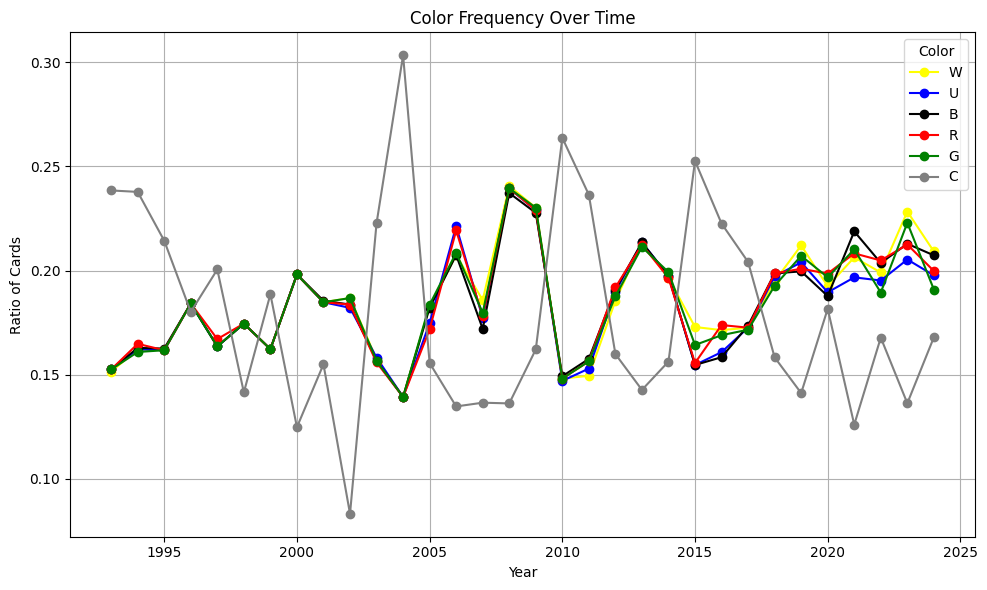

In [4]:
df_colors = analyze.explode_by_colors(df_all_cards)
df_all_cards = analyze.compute_color_features(df_all_cards)
df_merged = analyze.compute_color_frequency(df_colors, df_cards_per_year)
plot.plot_color_frequency(df_merged)



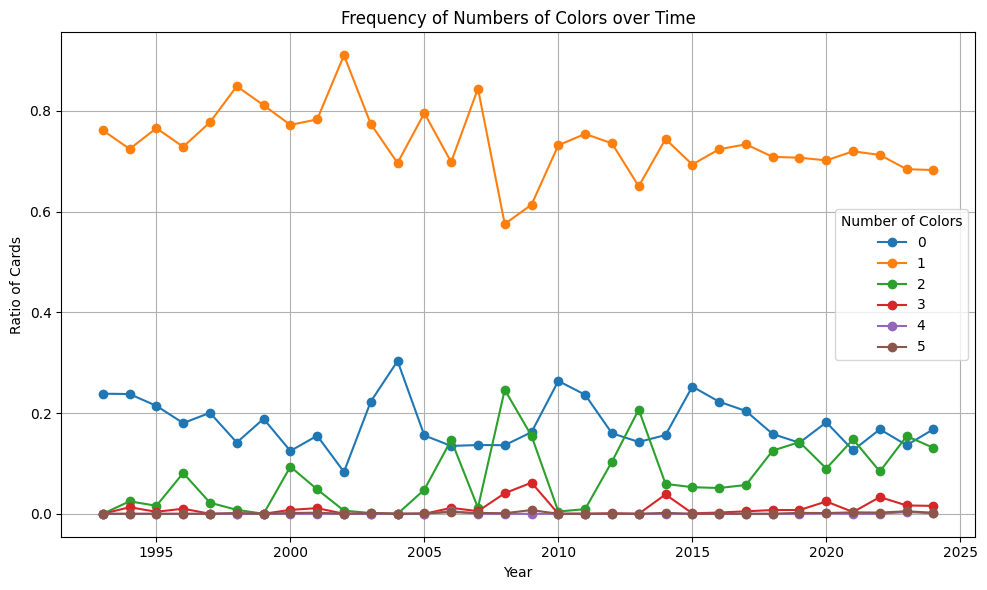

In [5]:
df_merged = analyze.compute_num_color_frequency(df_all_cards, df_cards_per_year)
plot.plot_num_color_frequency(df_merged)

## Card Complexity

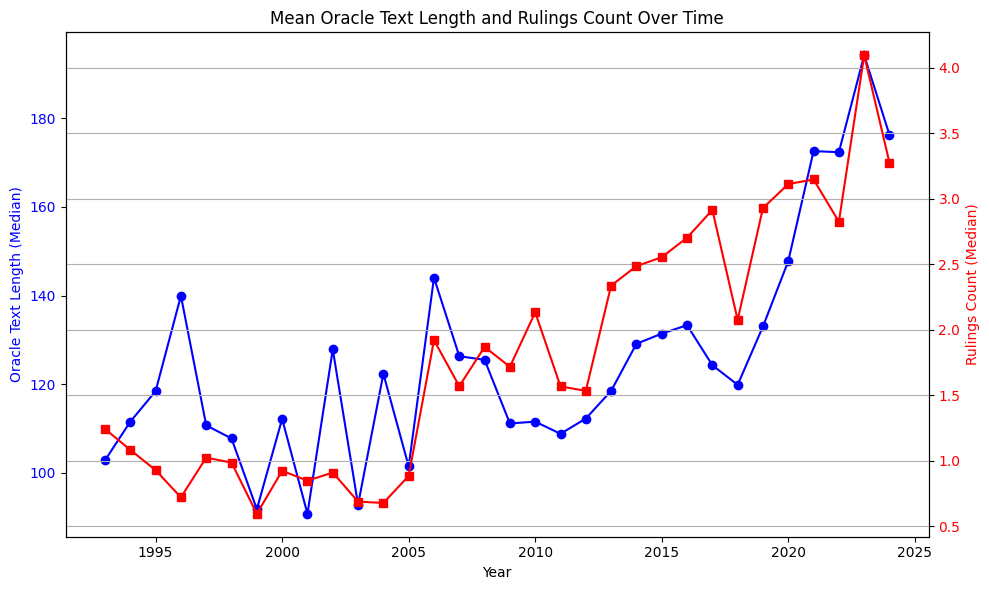

In [6]:
df_means = analyze.compute_complexity(df_all_cards)

plot.plot_complexity(df_means)

## Mana Value over Time

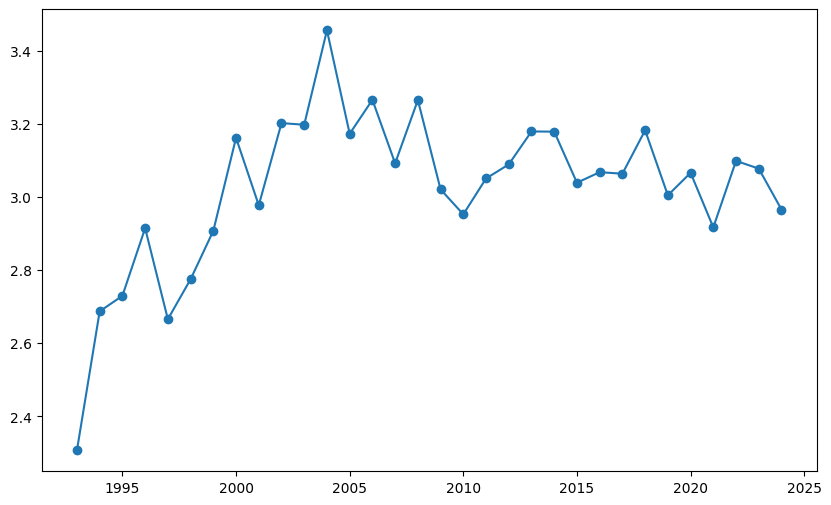

In [7]:

df_mana_value_over_time = analyze.compute_mana_value(df_all_cards)
# df_mana_value_over_time = (
#     df_all_cards
#     .groupby('release_year')[['mana_value']]
#     .mean()
#     .reset_index()
# )
plot.plot_mana_value(df_mana_value_over_time)
# plt.figure(figsize=(10,6))
# plt.plot(
#     df_mana_value_over_time['release_year'],
#     df_mana_value_over_time['mana_value'],
#     marker = 'o'
# )